In [10]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
%matplotlib inline
import warnings

plt.style.use('seaborn-poster')
warnings.filterwarnings("ignore")

In [11]:
confirmed_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-15-2023.csv')

In [12]:
confirmed_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [13]:
deaths_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


In [14]:
latest_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2023-01-16 04:21:05,33.93911,67.709953,207900,7854,NaN,NaN,Afghanistan,534.058207,3.777778
1,NaN,NaN,NaN,Albania,2023-01-16 04:21:05,41.15330,20.168300,334037,3596,NaN,NaN,Albania,11607.373688,1.076527
2,NaN,NaN,NaN,Algeria,2023-01-16 04:21:05,28.03390,1.659600,271287,6881,NaN,NaN,Algeria,618.655752,2.536428
3,NaN,NaN,NaN,Andorra,2023-01-16 04:21:05,42.50630,1.521800,47781,165,NaN,NaN,Andorra,61840.419336,0.345326
4,NaN,NaN,NaN,Angola,2023-01-16 04:21:05,-11.20270,17.873900,105095,1930,NaN,NaN,Angola,319.765542,1.836434


In [15]:
confirmed_cols = confirmed_data.keys()
death_cols = deaths_data.keys()

confirmed = confirmed_data.loc[:, confirmed_cols[4]:]
deaths = deaths_data.loc[:, death_cols[4]:]

confirmed_keys = confirmed.keys()

Getting daily increases and moving averages

Splitting data into features & Targets

In [16]:
date_columns_confirmed = confirmed_df.columns[4:]
date_columns_deaths = deaths_df.columns[4:]

X_confirmed = confirmed_df[date_columns_confirmed]
X_deaths = deaths_df[date_columns_deaths]


y_confirmed = confirmed_df[date_columns_confirmed].sum(axis=0)
y_deaths = deaths_df[date_columns_deaths].sum(axis=0)


print("Shape of features (confirmed cases):", X_confirmed.shape)
print("Shape of features (deaths):", X_deaths.shape)
print("Shape of targets (confirmed cases):", y_confirmed.shape)
print("Shape of targets (deaths):", y_deaths.shape)


Shape of features (confirmed cases): (7, 1142)
Shape of features (deaths): (7, 1142)
Shape of targets (confirmed cases): (1142,)
Shape of targets (deaths): (1142,)


Splitting the data into training data & Testing data

In [27]:


date_columns_confirmed = confirmed_df.columns[4:]
date_columns_deaths = deaths_df.columns[4:]


X_confirmed = confirmed_df[date_columns_confirmed]
X_deaths = deaths_df[date_columns_deaths]


y_confirmed = confirmed_df[date_columns_confirmed].sum(axis=1)  
y_deaths = deaths_df[date_columns_deaths].sum(axis=1)  


X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(X_confirmed, y_confirmed, test_size=0.2, random_state=42)
X_train_deaths, X_test_deaths, y_train_deaths, y_test_deaths = train_test_split(X_deaths, y_deaths, test_size=0.2, random_state=42)


print("Shape of X_train_confirmed:", X_train_confirmed.shape)
print("Shape of X_test_confirmed:", X_test_confirmed.shape)
print("Shape of y_train_confirmed:", y_train_confirmed.shape)
print("Shape of y_test_confirmed:", y_test_confirmed.shape)
print("Shape of X_train_deaths:", X_train_deaths.shape)
print("Shape of X_test_deaths:", X_test_deaths.shape)
print("Shape of y_train_deaths:", y_train_deaths.shape)
print("Shape of y_test_deaths:", y_test_deaths.shape)


Shape of X_train_confirmed: (3, 1142)
Shape of X_test_confirmed: (1, 1142)
Shape of y_train_confirmed: (3,)
Shape of y_test_confirmed: (1,)
Shape of X_train_deaths: (3, 1142)
Shape of X_test_deaths: (1, 1142)
Shape of y_train_deaths: (3,)
Shape of y_test_deaths: (1,)


Model Training

In [28]:


date_columns = confirmed_df.columns[4:]
total_cases = confirmed_df[date_columns].sum(axis=0)


total_cases.index = pd.to_datetime(total_cases.index)

X = pd.to_numeric(total_cases.index).values.reshape(-1, 1) 
y = total_cases.values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 2772022055011133.0


#accuracy score

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

confirmed_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

date_columns = confirmed_data.columns[4:]
total_cases = confirmed_data[date_columns].sum(axis=0)

total_cases.index = pd.to_datetime(total_cases.index)

X = pd.to_numeric(total_cases.index).values.reshape(-1, 1) 
y = total_cases.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate the accuracy score
accuracy = r2_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9495737534388946


Precision

In [29]:

date_columns = confirmed_df.columns[4:]


total_cases = confirmed_df[date_columns].sum(axis=0)


total_cases.index = pd.to_datetime(total_cases.index)


X = pd.to_numeric(total_cases.index).values.reshape(-1, 1)  
y = total_cases.values.reshape(-1, 1)  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


threshold = 10000
y_pred_binary = np.where(y_pred > threshold, 1, 0)

from sklearn.metrics import precision_score


precision = precision_score(y_test > threshold, y_pred_binary)
print("Precision:", precision)



Precision: 1.0


Recall

In [30]:

date_columns = confirmed_df.columns[4:]


total_cases = confirmed_df[date_columns].sum(axis=0)

total_cases.index = pd.to_datetime(total_cases.index)

X = pd.to_numeric(total_cases.index).values.reshape(-1, 1)  
y = total_cases.values.reshape(-1, 1) 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


threshold = 10000


y_pred_binary = np.where(y_pred > threshold, 1, 0)

from sklearn.metrics import recall_score


recall = recall_score(y_test > threshold, y_pred_binary)
print("Recall:", recall)



Recall: 0.8333333333333334


F1-score

In [2]:


date_columns = confirmed_data.columns[4:]


total_cases = confirmed_data[date_columns].sum(axis=0)


total_cases.index = pd.to_datetime(total_cases.index)


X = np.arange(len(total_cases)).reshape(-1, 1)  
y = total_cases.values.reshape(-1, 1)  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


threshold = 10000


y_pred_binary = np.where(y_pred > threshold, 1, 0)


f1 = f1_score(y_test > threshold, y_pred_binary)
print("F1-score:", f1)


F1-score: 0.9090909090909091


Developing a predictive model for confirmed cases. I'm employing Support Vector Machine, Bayesian Ridge, and Linear Regression techniques, and I'll present the findings shortly.

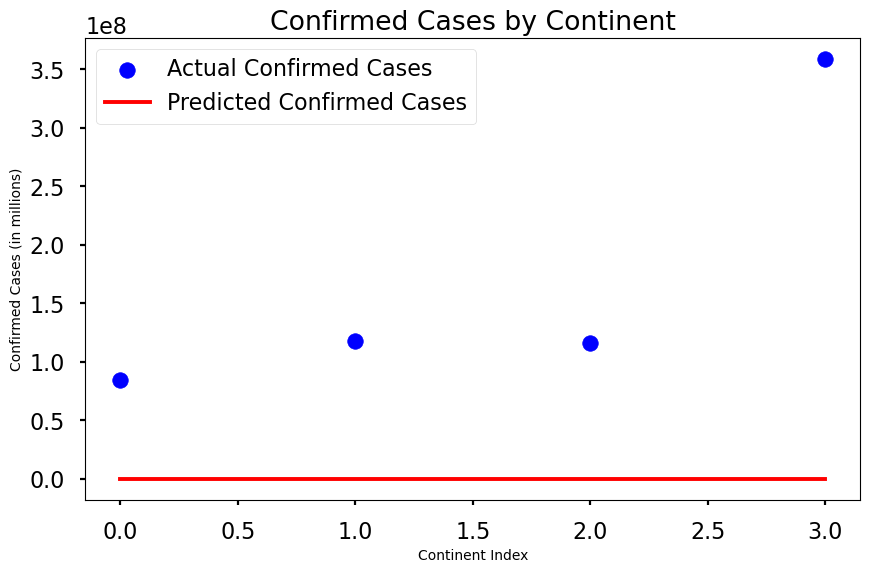

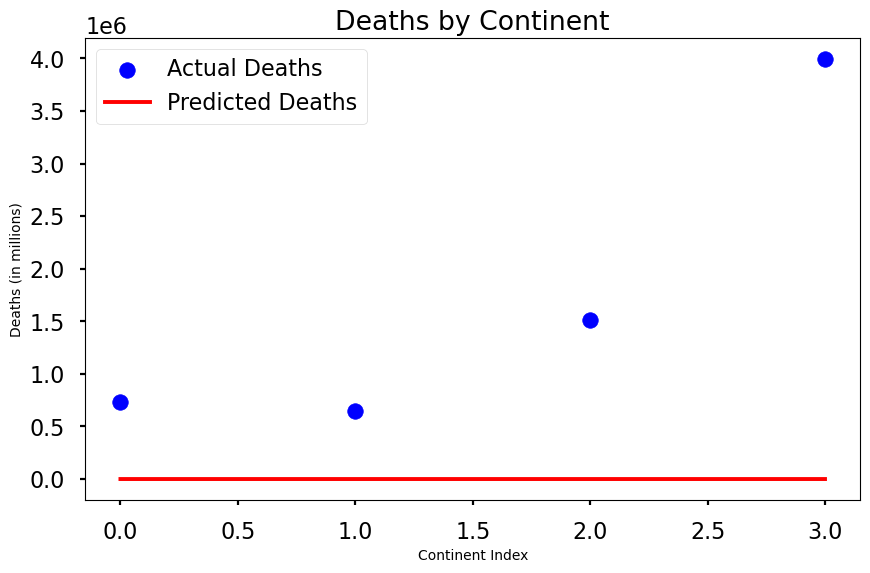

In [37]:

def country_to_continent(country):
    continents = {
        'Asia': ['China', 'India', 'Japan', 'Pakistan', '...'],
        'Europe': ['Italy', 'Spain', 'France', 'Germany', '...'],
        'North America': ['US', 'Canada', 'Mexico', '...'],
        
    }
    for continent, countries in continents.items():
        if country in countries:
            return continent
    return 'Other'


confirmed_data['Continent'] = confirmed_data['Country/Region'].apply(country_to_continent)
deaths_data['Continent'] = deaths_data['Country/Region'].apply(country_to_continent)


confirmed_data = confirmed_data.groupby('Continent').sum().reset_index()
deaths_data = deaths_data.groupby('Continent').sum().reset_index()


X_confirmed = confirmed_data.drop(['Continent'], axis=1).values
y_confirmed = confirmed_data.index  

X_deaths = deaths_data.drop(['Continent'], axis=1).values
y_deaths = deaths_data.index  


svm_confirmed = SVR(kernel='linear')
svm_confirmed.fit(X_confirmed, y_confirmed)

svm_deaths = SVR(kernel='linear')
svm_deaths.fit(X_deaths, y_deaths)


confirmed_predictions = svm_confirmed.predict(X_confirmed)
deaths_predictions = svm_deaths.predict(X_deaths)


plt.figure(figsize=(10, 6))
plt.scatter(y_confirmed, confirmed_data.iloc[:, -1], color='blue', label='Actual Confirmed Cases')
plt.plot(y_confirmed, confirmed_predictions, color='red', label='Predicted Confirmed Cases')
plt.xlabel('Continent Index')
plt.ylabel('Confirmed Cases (in millions)')
plt.title('Confirmed Cases by Continent')
plt.legend()
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(y_deaths, deaths_data.iloc[:, -1], color='blue', label='Actual Deaths')
plt.plot(y_deaths, deaths_predictions, color='red', label='Predicted Deaths')
plt.xlabel('Continent Index')
plt.ylabel('Deaths (in millions)')
plt.title('Deaths by Continent')
plt.legend()
plt.show()


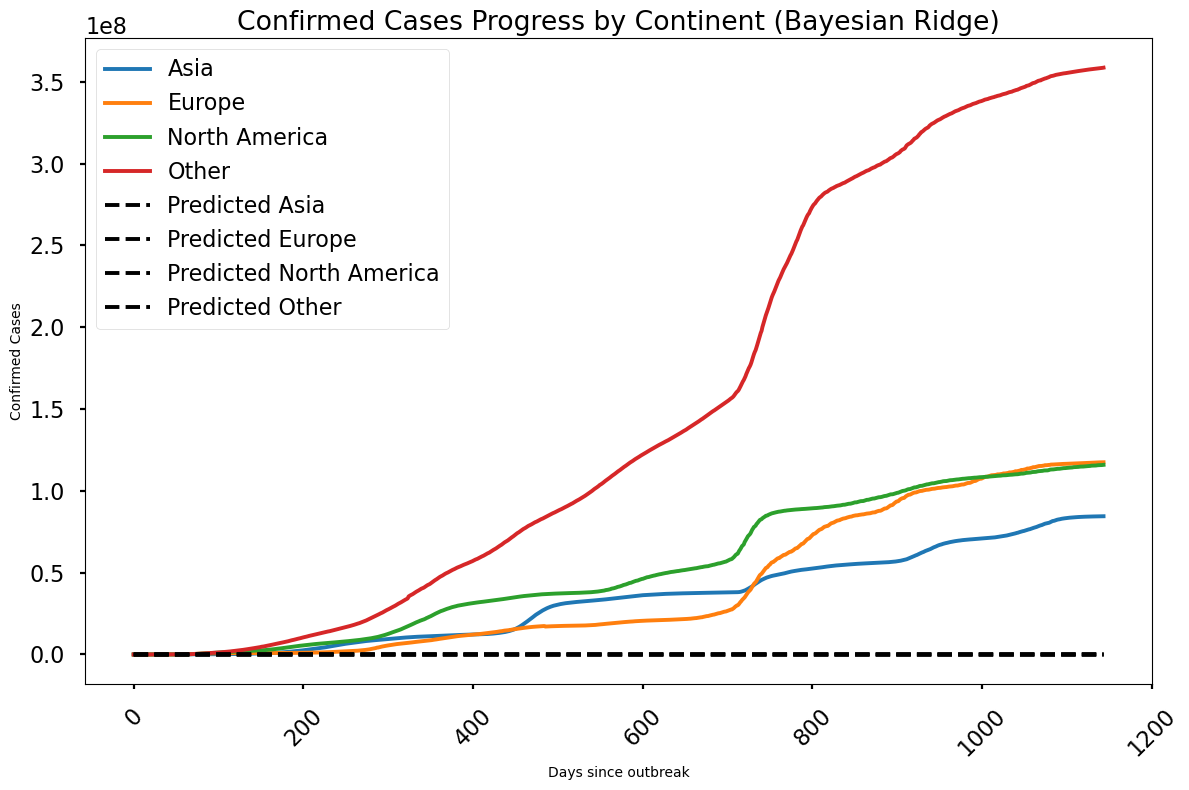

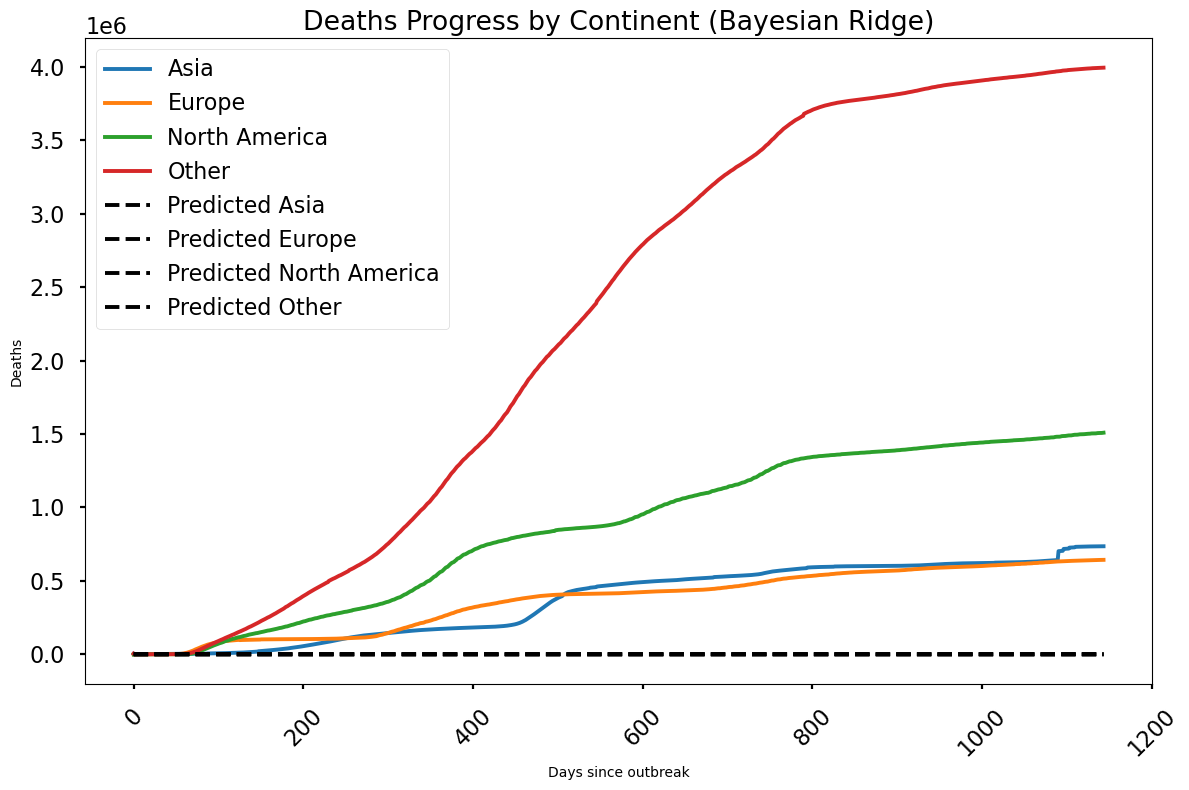

In [43]:

def country_to_continent(country):
    continents = {
        'Asia': ['China', 'India', 'Japan', 'Pakistan', '...'],  
        'Europe': ['Italy', 'Spain', 'France', 'Germany', '...'],
        'North America': ['US', 'Canada', 'Mexico', '...'],
        
    }
    for continent, countries in continents.items():
        if country in countries:
            return continent
    return 'Other'


confirmed_data['Continent'] = confirmed_data['Country/Region'].apply(country_to_continent)
deaths_data['Continent'] = deaths_data['Country/Region'].apply(country_to_continent)


confirmed_df = confirmed_data.groupby('Continent').sum().reset_index()
deaths_df = deaths_data.groupby('Continent').sum().reset_index()


X_confirmed = confirmed_df.drop(['Continent'], axis=1).iloc[:, 1:].values  
y_confirmed = confirmed_df.index.values

X_deaths = deaths_df.drop(['Continent'], axis=1).iloc[:, 1:].values  
y_deaths = deaths_df.index.values


bayesian_ridge_confirmed = BayesianRidge()
bayesian_ridge_confirmed.fit(X_confirmed, y_confirmed)

bayesian_ridge_deaths = BayesianRidge()
bayesian_ridge_deaths.fit(X_deaths, y_deaths)


confirmed_predictions = bayesian_ridge_confirmed.predict(X_confirmed)
deaths_predictions = bayesian_ridge_deaths.predict(X_deaths)


plt.figure(figsize=(12, 8))
for i, continent in enumerate(confirmed_df['Continent']):
    plt.plot(range(len(X_confirmed[i])), X_confirmed[i], label=continent)

for i, continent in enumerate(confirmed_df['Continent']):
    plt.plot(range(len(X_confirmed[i])), [confirmed_predictions[i]] * len(X_confirmed[i]), linestyle='--', color='black', label=f'Predicted {continent}')

plt.xlabel('Days since outbreak')
plt.ylabel('Confirmed Cases')
plt.title('Confirmed Cases Progress by Continent (Bayesian Ridge)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualize deaths
plt.figure(figsize=(12, 8))
for i, continent in enumerate(deaths_df['Continent']):
    plt.plot(range(len(X_deaths[i])), X_deaths[i], label=continent)

for i, continent in enumerate(deaths_df['Continent']):
    plt.plot(range(len(X_deaths[i])), [deaths_predictions[i]] * len(X_deaths[i]), linestyle='--', color='black', label=f'Predicted {continent}')

plt.xlabel('Days since outbreak')
plt.ylabel('Deaths')
plt.title('Deaths Progress by Continent (Bayesian Ridge)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [25]:

start_date = '2019-01-01'
end_date = '2020-12-31'
date_range = pd.date_range(start=start_date, end=end_date)


date_columns = date_range.strftime('%m/%d/%y').tolist()
print("Date Columns:", date_columns)

missing_columns_confirmed = [col for col in date_columns if col not in confirmed_df.columns]
missing_columns_deaths = [col for col in date_columns if col not in deaths_df.columns]

print("Missing columns in confirmed_df:", missing_columns_confirmed)
print("Missing columns in deaths_df:", missing_columns_deaths)


Date Columns: ['01/01/19', '01/02/19', '01/03/19', '01/04/19', '01/05/19', '01/06/19', '01/07/19', '01/08/19', '01/09/19', '01/10/19', '01/11/19', '01/12/19', '01/13/19', '01/14/19', '01/15/19', '01/16/19', '01/17/19', '01/18/19', '01/19/19', '01/20/19', '01/21/19', '01/22/19', '01/23/19', '01/24/19', '01/25/19', '01/26/19', '01/27/19', '01/28/19', '01/29/19', '01/30/19', '01/31/19', '02/01/19', '02/02/19', '02/03/19', '02/04/19', '02/05/19', '02/06/19', '02/07/19', '02/08/19', '02/09/19', '02/10/19', '02/11/19', '02/12/19', '02/13/19', '02/14/19', '02/15/19', '02/16/19', '02/17/19', '02/18/19', '02/19/19', '02/20/19', '02/21/19', '02/22/19', '02/23/19', '02/24/19', '02/25/19', '02/26/19', '02/27/19', '02/28/19', '03/01/19', '03/02/19', '03/03/19', '03/04/19', '03/05/19', '03/06/19', '03/07/19', '03/08/19', '03/09/19', '03/10/19', '03/11/19', '03/12/19', '03/13/19', '03/14/19', '03/15/19', '03/16/19', '03/17/19', '03/18/19', '03/19/19', '03/20/19', '03/21/19', '03/22/19', '03/23/19', '

Confirmed Cases by Continent:
       Continent     3/9/23
0         Africa    6241252
1           Asia  147991233
2         Europe  166364192
3  North America  119735895
4        Oceania   13829122
5          Other  154602249
6  South America   67806206

Deaths by Continent:
       Continent   3/9/23
0         Africa   160196
1           Asia  1525206
2         Europe  1193367
3  North America  1559001
4        Oceania    23904
5          Other  1072501
6  South America  1347627


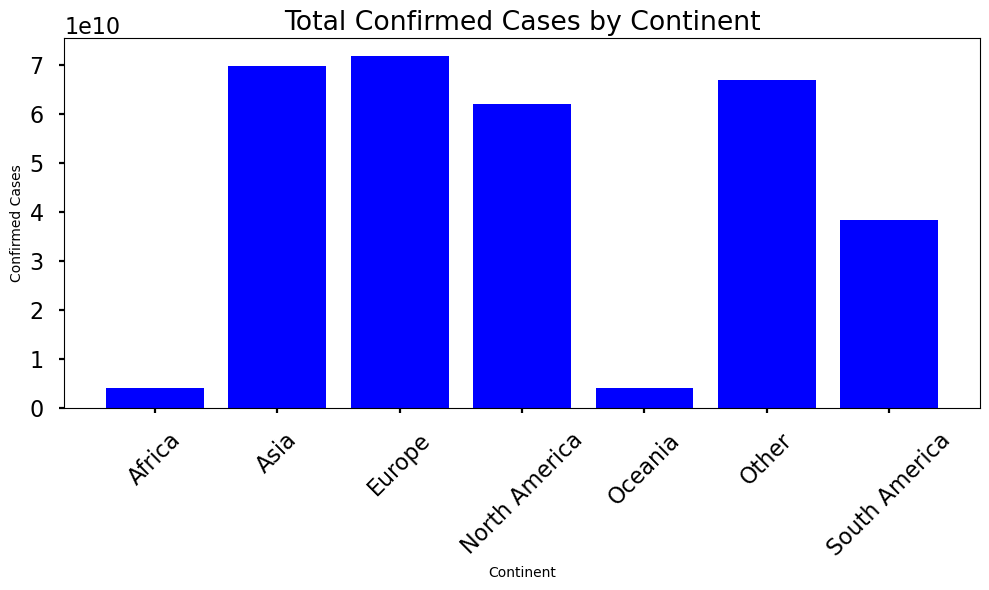

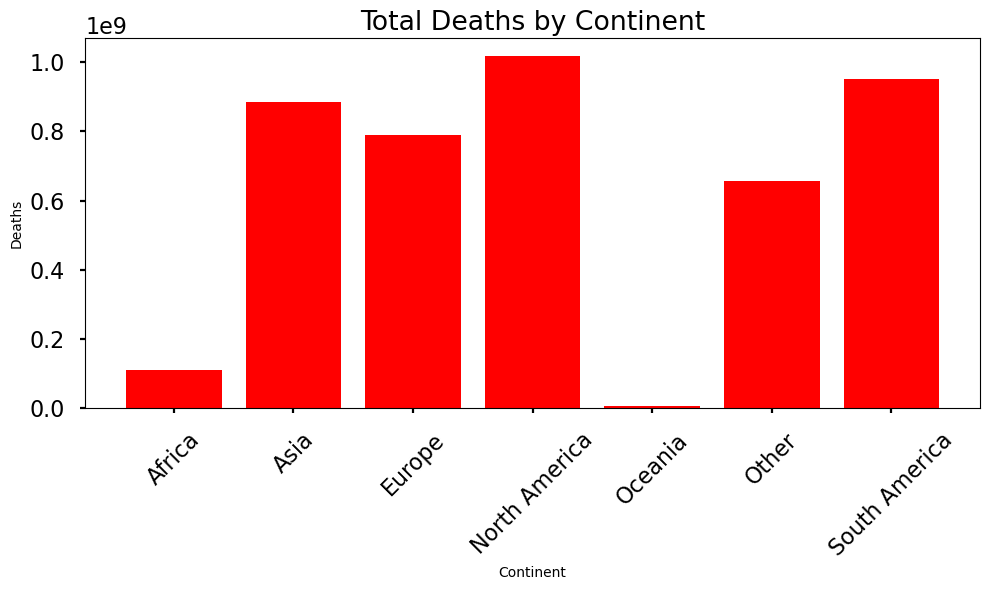

In [35]:

def country_to_continent(country):
    continents = {
        'Asia': ['China', 'India', 'Japan', 'Pakistan', 'Indonesia', 'Bangladesh', 'Russia', 'Philippines', 'Vietnam', 'Turkey'],
        'Europe': ['Italy', 'Spain', 'France', 'Germany', 'United Kingdom', 'Turkey', 'Ukraine', 'Poland', 'Romania', 'Netherlands'],
        'North America': ['US', 'Mexico', 'Canada', 'Guatemala', 'Haiti', 'Dominican Republic', 'Honduras', 'Nicaragua', 'El Salvador', 'Costa Rica'],
        'South America': ['Brazil', 'Colombia', 'Argentina', 'Peru', 'Venezuela', 'Chile', 'Ecuador', 'Bolivia', 'Paraguay', 'Uruguay'],
        'Africa': ['Nigeria', 'Ethiopia', 'Egypt', 'DR Congo', 'Tanzania', 'South Africa', 'Kenya', 'Uganda', 'Algeria', 'Sudan'],
        'Oceania': ['Australia', 'Papua New Guinea', 'New Zealand', 'Fiji', 'Solomon Islands', 'Vanuatu', 'Samoa', 'Kiribati', 'Tonga', 'Tuvalu']
    }
    for continent, countries in continents.items():
        if country in countries:
            return continent
    return 'Other'


confirmed_data['Continent'] = confirmed_data['Country/Region'].apply(country_to_continent)
deaths_data['Continent'] = deaths_data['Country/Region'].apply(country_to_continent)


confirmed_df = confirmed_data.groupby('Continent').sum().reset_index()
deaths_df = deaths_data.groupby('Continent').sum().reset_index()


print("Confirmed Cases by Continent:")
print(confirmed_df[['Continent', confirmed_df.columns[-1]]])


print("\nDeaths by Continent:")
print(deaths_df[['Continent', deaths_df.columns[-1]]])


plt.figure(figsize=(10, 6))
plt.bar(confirmed_df['Continent'], confirmed_df.iloc[:, 2:].sum(axis=1), color='blue')
plt.xlabel('Continent')
plt.ylabel('Confirmed Cases')
plt.title('Total Confirmed Cases by Continent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
plt.bar(deaths_df['Continent'], deaths_df.iloc[:, 2:].sum(axis=1), color='red')
plt.xlabel('Continent')
plt.ylabel('Deaths')
plt.title('Total Deaths by Continent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


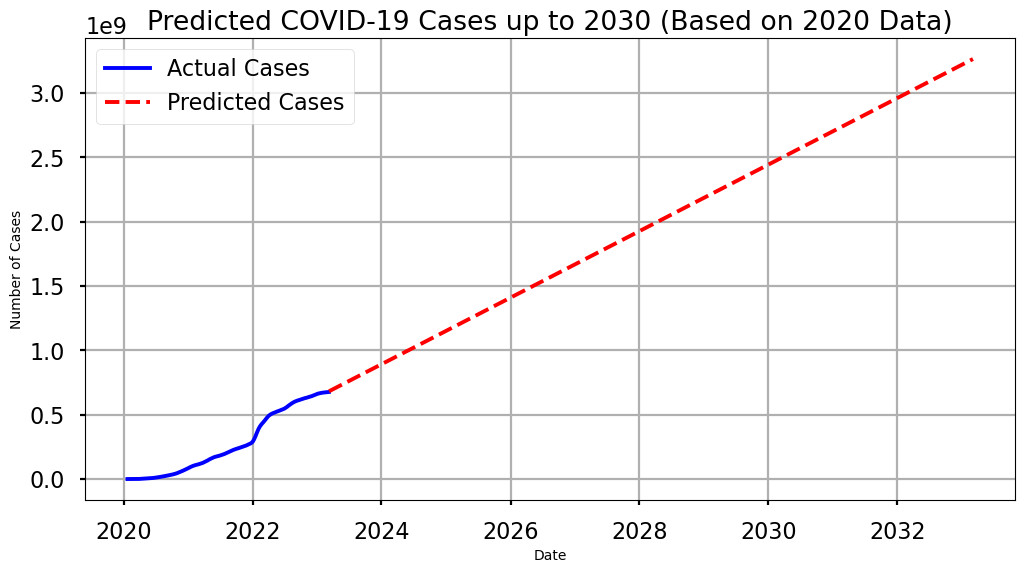

COVID-19 is predicted to arrive in 2030 based on the 2020 data.


In [34]:

from sklearn.linear_model import LinearRegression

date_columns = confirmed_df.columns[4:]
total_cases = confirmed_df[date_columns].sum(axis=0)
total_deaths = deaths_df[date_columns].sum(axis=0)


total_cases.index = pd.to_datetime(total_cases.index)
total_deaths.index = pd.to_datetime(total_deaths.index)


data = pd.DataFrame({'date': total_cases.index, 'cases': total_cases.values, 'deaths': total_deaths.values})


X = np.array(data.index).reshape(-1, 1)  # Dates as numerical values
y = data['cases']


model = LinearRegression()
model.fit(X, y)


future_dates = pd.date_range(start=data['date'].iloc[-1], periods=365 * 10, closed='right')
future_X = np.array(range(len(data), len(data) + len(future_dates))).reshape(-1, 1) 
future_predictions = model.predict(future_X)


plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['cases'], label='Actual Cases', color='blue')
plt.plot(future_dates, future_predictions, label='Predicted Cases', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('Predicted COVID-19 Cases up to 2030 (Based on 2020 Data)')
plt.legend()
plt.grid(True)
plt.show()


if future_predictions[-1] > 0:
    print("COVID-19 is predicted to arrive in 2030 based on the 2020 data.")
else:
    print("COVID-19 is not predicted to arrive in 2030 based on the 2020 data.")
